In [148]:
# Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

In [149]:
# Loading the training dataset
trainingData = pd.read_csv('Datasets/train.csv')
trainDf = pd.DataFrame(trainingData)
trainDf.shape

(614, 13)

In [150]:
trainDf.describe()

/Users/Raj/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [151]:
# Loading the first 5 rows
trainDf[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [153]:
# Replacing the values with 0,1...
trainDf['Gender'] = trainDf['Gender'].map({'Female':0,'Male':1})
trainDf['Married'] = trainDf['Married'].map({'No':0, 'Yes':1})
trainDf['Education'] = trainDf['Education'].map({'Not Graduate':0, 'Graduate':1})
trainDf['Self_Employed'] = trainDf['Self_Employed'].map({'No':0, 'Yes':1})
trainDf['Property_Area'] = trainDf['Property_Area'].map({'Urban':3, 'Semiurban':2, 'Rural':1})
trainDf['Loan_Status'] = trainDf['Loan_Status'].map({'N':0, 'Y':1})

In [154]:
#Dependents_dummies = pd.get_dummies(trainDf['Dependents'], prefix='Dependents')
#Dependents_dummies = pd.get_dummies(trainDf, columns=['Dependents'])
trainDf.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents            object
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [155]:
trainDf[0:].fillna(trainDf.median, inplace=True)
trainDf.describe()

/Users/Raj/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,0.0,0.0,0.0,0.0,614.000000,614.000000,592.000000,600.00000,564.000000,0.0,0.0
mean,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2877.500000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,3812.500000,1188.500000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5795.000000,2297.250000,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,81000.000000,41667.000000,700.000000,480.00000,1.000000,NaN,NaN


In [156]:
# Loading the first 5 rows
trainDf[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,NaN,NaN,0,NaN,NaN,5849,0.0,NaN,360.0,1.0,NaN,NaN
1,LP001003,NaN,NaN,1,NaN,NaN,4583,1508.0,128.0,360.0,1.0,NaN,NaN
2,LP001005,NaN,NaN,0,NaN,NaN,3000,0.0,66.0,360.0,1.0,NaN,NaN
3,LP001006,NaN,NaN,0,NaN,NaN,2583,2358.0,120.0,360.0,1.0,NaN,NaN
4,LP001008,NaN,NaN,0,NaN,NaN,6000,0.0,141.0,360.0,1.0,NaN,NaN


In [157]:
sns.barplot(x='Gender', y='Loan_Status',data=trainDf)

ValueError: min() arg is an empty sequence

In [158]:
sns.barplot(x='Married', y='Loan_Status',data=trainDf)

ValueError: min() arg is an empty sequence

In [159]:
sns.barplot(x='Dependents', y='Loan_Status',data=trainDf)

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

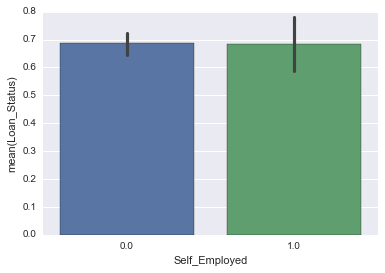

In [117]:
sns.barplot(x='Self_Employed', y='Loan_Status',data=trainDf)

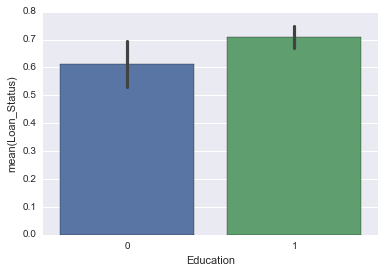

In [118]:
sns.barplot(x='Education', y='Loan_Status',data=trainDf)

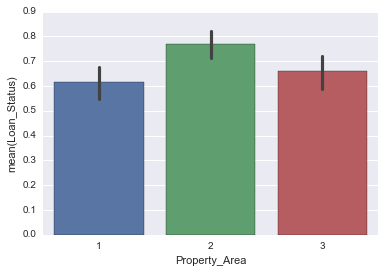

In [119]:
sns.barplot(x='Property_Area', y='Loan_Status',data=trainDf)

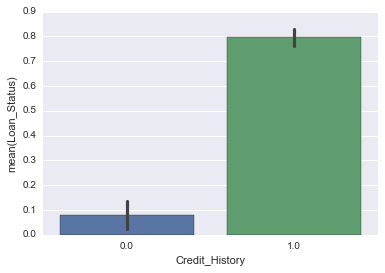

In [120]:
sns.barplot(x='Credit_History', y='Loan_Status',data=trainDf)

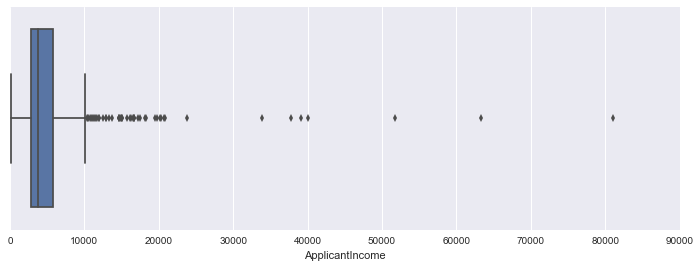

In [121]:
sns.boxplot(x='ApplicantIncome',data=trainDf).figure.set_size_inches(12,4)

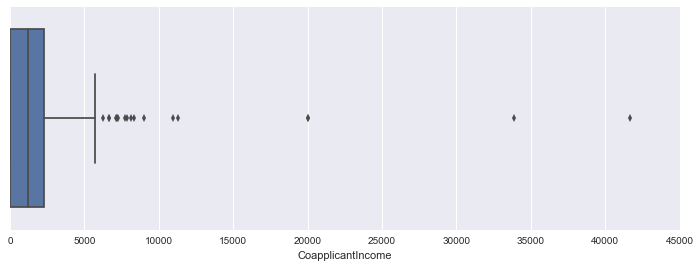

In [122]:
sns.boxplot(x='CoapplicantIncome',data=trainDf).figure.set_size_inches(12,4)

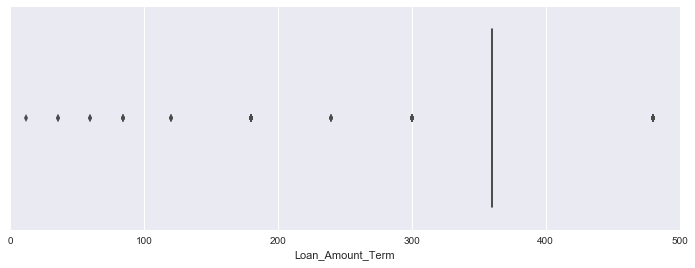

In [123]:
sns.boxplot(x='Loan_Amount_Term',data=trainDf).figure.set_size_inches(12,4)

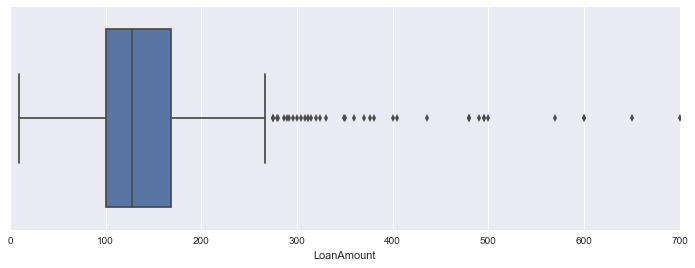

In [124]:
sns.boxplot(x='LoanAmount',data=trainDf).figure.set_size_inches(12,4)

In [125]:
trainDf.describe()

/Users/Raj/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,2.037459,0.687296
std,0.389718,0.476920,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,1.000000,0.000000
25%,NaN,NaN,1.000000,NaN,2877.500000,0.000000,NaN,NaN,NaN,1.000000,0.000000
50%,NaN,NaN,1.000000,NaN,3812.500000,1188.500000,NaN,NaN,NaN,2.000000,1.000000
75%,NaN,NaN,1.000000,NaN,5795.000000,2297.250000,NaN,NaN,NaN,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,3.000000,1.000000


In [126]:
trainDf.fillna(trainDf.median, inplace=True)

In [127]:
trainDf.describe()

,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.781759,5403.459283,1621.245798,2.037459,0.687296
std,0.413389,6109.041673,2926.248369,0.787482,0.463973
min,0.000000,150.000000,0.000000,1.000000,0.000000
25%,1.000000,2877.500000,0.000000,1.000000,0.000000
50%,1.000000,3812.500000,1188.500000,2.000000,1.000000
75%,1.000000,5795.000000,2297.250000,3.000000,1.000000
max,1.000000,81000.000000,41667.000000,3.000000,1.000000
